In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

from sklearn.tree import export_graphviz
import graphviz

dataset = pd.read_csv('../data/cleaned/aggregated_dataset.csv')

dataset = dataset.iloc[:, :15]

dataset

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,PREAM_LEN,CIR0,CIR1,CIR2,CIR3
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,1024.0,129.0,312.0,331.0,141.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,1024.0,117.0,163.0,199.0,136.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,1024.0,433.0,240.0,233.0,81.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,1024.0,466.0,247.0,407.0,225.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,1024.0,259.0,239.0,57.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,1024.0,202.0,224.0,51.0,300.0
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,1024.0,190.0,153.0,199.0,85.0
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,1024.0,504.0,363.0,188.0,150.0
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,1024.0,337.0,396.0,243.0,245.0


In [41]:
X = dataset.drop('NLOS', axis=1)
y = dataset['NLOS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = rf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9069047619047619


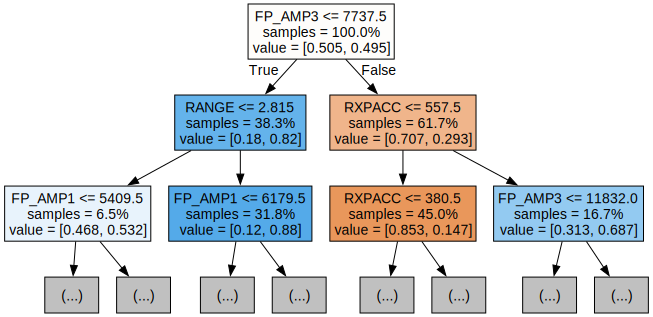

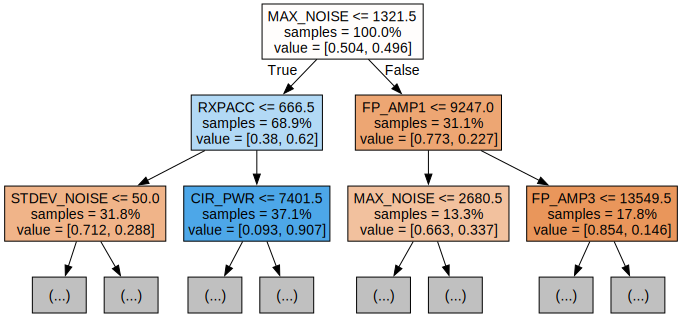

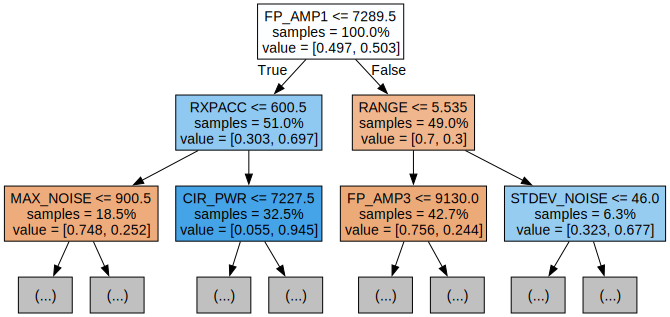

In [45]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [46]:
rand_params = {'n_estimators': randint(15, 50), 'max_depth': randint(0, 20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = rand_params,
                                 n_iter = 5,
                                 cv = 5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A1CB1BFDF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A1FCAE3850>})

In [47]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters: ', rand_search.best_params_)

Best hyperparameters:  {'max_depth': 18, 'n_estimators': 48}


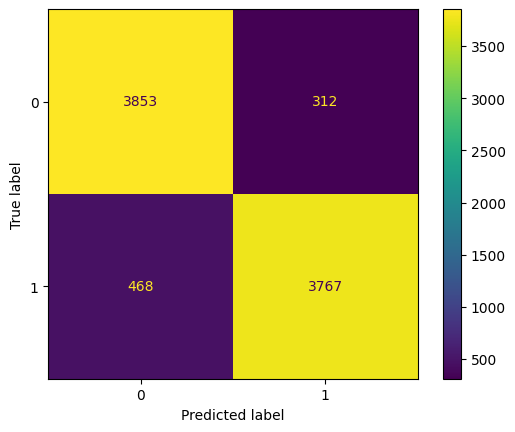

In [48]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [49]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Accuracy: ', precision)
print('Accuracy: ', recall)

Accuracy:  0.9071428571428571
Accuracy:  0.9235106643785241
Accuracy:  0.8894923258559623


<Axes: >

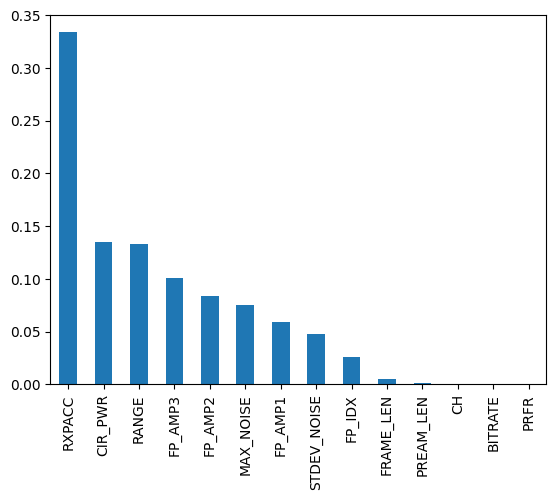

In [50]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importance.plot.bar()